In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
!pwd

/c/Users/Bharath/anaconda3/envs/SG_Land_Reclamation_analysis


In [3]:
!ls

Approx_SG.kml
debug.log
Extracting SG from Landsat 8 images.ipynb
HDB data
Image_processing_experiments2.ipynb
Landsat8_image_analysis_FINAL.ipynb
Landsat8_image_processing_experimentation.ipynb
Population_density_and_Housing_density_analysis.ipynb
SG_cropped_Landsat8_images
SG_Landsat8_images
SG_shapefiles
Untitled.ipynb


In [4]:
os.chdir('HDB data/')

In [5]:
!ls

dwelling-units-under-hdbs-management-by-town-and-flat-type.csv
estimated-percentage-of-singapore-resident-population-in-hdb-flats.csv
estimated-resident-population-in-hdb-flats-by-town.csv
Houses_by_type_2020.png
metadata-estimated-resident-population-living-in-hdb-flats.txt
metadata-number-of-residential-units-under-hdb-s-management.txt
metadata-total-land-area-of-singapore.txt
total-land-area-of-singapore.csv
World_bank_population_data.csv


### Terminology

##### 1. HDB: Housing and Development Board 
    HDB is a Singaporean Government board that is responsible for planning all the government housing of Singapore. 
    As of today, over 80% of the residents of Singapore (Citizens and Permanent Residents) stay in HDB apartments.

### DataFrames: 

#### 1. *population_in_HDB_data* : 
    Contains data of the population living in HDB apartments (separated by districts) from 2008 to 2018.
    Source: https://data.gov.sg/
    
#### 2. *percentage_population_in_HDB_data* :
    Contains data of the percentage population of Singapore living in HDB apartments from 2007 to 2018.
    Source: https://data.gov.sg/
    
#### 3. *yearly_population_in_SG_data* :
    DataFrame containing information about population living in HDB, population living outside HDB and total population of Singapore from 2008 to 2018. Data created by combining data from 'population_in_HDB_data' and 'percentage_population_in_HDB_data'.

## 1. Population of Singapore over the years

In [6]:
population_in_HDB_data = pd.read_csv('estimated-resident-population-in-hdb-flats-by-town.csv')

In [7]:
population_in_HDB_data.head(30)

,financial_year,town_or_estate,population
0,2008,Ang Mo Kio,148200
1,2008,Bedok,197900
2,2008,Bishan,66500
3,2008,Bukit Batok,109100
4,2008,Bukit Merah,140600
5,2008,Bukit Panjang,110100
6,2008,Bukit Timah,8200
7,2008,Choa Chu Kang,153000
8,2008,Central Area,30100
9,2008,Clementi,72500


In [8]:
population_in_HDB_data[population_in_HDB_data['town_or_estate'] == 'Total']

,financial_year,town_or_estate,population
26,2008,Total,3020100
53,2009,Total,3094100
80,2010,Total,3125900
107,2011,Total,3156900
134,2012,Total,3165900
161,2013,Total,3213000
188,2014,Total,3217400
215,2015,Total,3234800
242,2016,Total,3249900


In [9]:
yearly_population_in_HDB_data = population_in_HDB_data[population_in_HDB_data['town_or_estate'] == 'Total']

In [10]:
yearly_population_in_HDB_data.reset_index(inplace = True)

In [11]:
yearly_population_in_HDB_data.drop('index', axis = 1, inplace = True)
yearly_population_in_HDB_data.drop('town_or_estate', axis = 1, inplace = True)

C:\Users\Bharath\anaconda3\envs\earth-analytics-python\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
yearly_population_in_HDB_data

,financial_year,population
0,2008,3020100
1,2009,3094100
2,2010,3125900
3,2011,3156900
4,2012,3165900
5,2013,3213000
6,2014,3217400
7,2015,3234800
8,2016,3249900


In [13]:
# Total population data is missing for 2017 and 2018
yearly = population_in_HDB_data.groupby('financial_year')
population_2017 = yearly.sum().iloc[-2]
population_2018 = yearly.sum().iloc[-1]

population_2017_Series = pd.Series({'financial_year': 2017, 'population': population_2017['population']})
population_2018_Series = pd.Series({'financial_year': 2018, 'population': population_2018['population']})

yearly_population_in_HDB_data = yearly_population_in_HDB_data.append(population_2017_Series, ignore_index= True)
yearly_population_in_HDB_data = yearly_population_in_HDB_data.append(population_2018_Series, ignore_index= True)

In [14]:
# Total population staying in HDB data (including 2017 and 2018)
yearly_population_in_HDB_data

#New dataframe to store yearly population in SG using data from population_in_HDB_data AND percentage_population_in_HDB_data
yearly_population_in_SG_data = yearly_population_in_HDB_data
yearly_population_in_SG_data.rename(columns = {'population': 'population_in_HDB'} ,inplace = True)


In [15]:
yearly_population_in_SG_data

,financial_year,population_in_HDB
0,2008,3020100
1,2009,3094100
2,2010,3125900
3,2011,3156900
4,2012,3165900
5,2013,3213000
6,2014,3217400
7,2015,3234800
8,2016,3249900
9,2017,3247500


In [16]:
percentage_population_in_HDB_data = pd.read_csv('estimated-percentage-of-singapore-resident-population-in-hdb-flats.csv')

In [17]:
percentage_population_in_HDB_data = percentage_population_in_HDB_data[percentage_population_in_HDB_data['type'] == 'HDB Flats']

In [18]:
percentage_population_in_HDB_data.reset_index(inplace= True)
percentage_population_in_HDB_data.drop('index', axis = 1, inplace = True)
percentage_population_in_HDB_data.drop([0], axis = 0, inplace = True)
percentage_population_in_HDB_data

,financial_year,type,percentage_of_pop_in
1,2008,HDB Flats,82
2,2009,HDB Flats,82
3,2010,HDB Flats,83
4,2011,HDB Flats,82
5,2012,HDB Flats,82
6,2013,HDB Flats,82
7,2014,HDB Flats,82
8,2015,HDB Flats,82
9,2016,HDB Flats,82
10,2017,HDB Flats,81


In [19]:
percentage_population_in_HDB_data.reset_index(inplace = True)
percentage_population_in_HDB_data.drop('index', axis = 1, inplace = True)

In [20]:
percentage_population_in_HDB_data

,financial_year,type,percentage_of_pop_in
0,2008,HDB Flats,82
1,2009,HDB Flats,82
2,2010,HDB Flats,83
3,2011,HDB Flats,82
4,2012,HDB Flats,82
5,2013,HDB Flats,82
6,2014,HDB Flats,82
7,2015,HDB Flats,82
8,2016,HDB Flats,82
9,2017,HDB Flats,81


In [21]:
population_outside_HDB = yearly_population_in_SG_data['population_in_HDB']*((100 - percentage_population_in_HDB_data['percentage_of_pop_in'])/percentage_population_in_HDB_data['percentage_of_pop_in'])

In [22]:
for i in range(len(population_outside_HDB)):
    population_outside_HDB[i] = int(population_outside_HDB[i])

population_outside_HDB

0     662948.0
1     679192.0
2     640244.0
3     692978.0
4     694953.0
5     705292.0
6     706258.0
7     710078.0
8     713392.0
9     761759.0
10    759624.0
dtype: float64

In [23]:
yearly_population_in_SG_data['population_outside_HDB'] = population_outside_HDB

In [24]:
yearly_population_in_SG_data['total_population'] = yearly_population_in_SG_data['population_in_HDB'] + yearly_population_in_SG_data['population_outside_HDB']

In [25]:
yearly_population_in_SG_data

,financial_year,population_in_HDB,population_outside_HDB,total_population
0,2008,3020100,662948.0,3683048.0
1,2009,3094100,679192.0,3773292.0
2,2010,3125900,640244.0,3766144.0
3,2011,3156900,692978.0,3849878.0
4,2012,3165900,694953.0,3860853.0
5,2013,3213000,705292.0,3918292.0
6,2014,3217400,706258.0,3923658.0
7,2015,3234800,710078.0,3944878.0
8,2016,3249900,713392.0,3963292.0
9,2017,3247500,761759.0,4009259.0


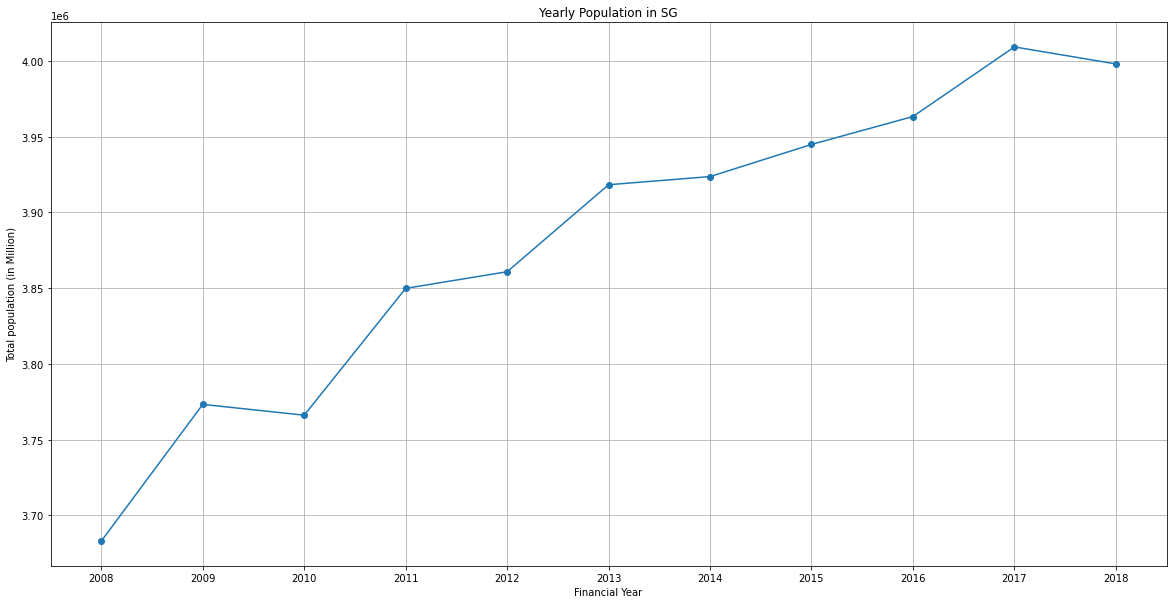

In [50]:
plt.figure(figsize=(20,10))
plt.plot(yearly_population_in_SG_data['financial_year'], yearly_population_in_SG_data['total_population'], '-o')

plt.xticks(list(range(2008,2019)))
plt.xlabel('Financial Year')
plt.ylabel('Total population (in Million)')
plt.title('Yearly Population in SG')
plt.grid()

## 2. Types of apartments (aka Flats) in Singapore (as of 2020)

- 1-Room Flats
- 2-Room Flats
- 3-Room Flats
- 4-Room Flats
- 5-Room Flats
- Executive Condominiums
- Studio Apartments


*Source: HDB 2019/2020 Annual Report*

In [113]:
apartment_types = {'1-Room': [30906] , '2-Room': [57660] , '3-Room': [243519] , '4-Room': [424769] ,'5-Room': [243707] , 'Exec': [65107] ,  'Studio': [8999] }

avg_flat_area = [31, 45.5, 68.2, 95.9, 118.4, 144, 42]

#Source: HDB 2019/2020 Annual Report

In [114]:
apartment_types_data = pd.DataFrame(data = apartment_types, index= ['No. of Flats'])

In [115]:
apartment_types_data

,1-Room,2-Room,3-Room,4-Room,5-Room,Exec,Studio
No. of Flats,30906,57660,243519,424769,243707,65107,8999


In [116]:
apartment_types_data = apartment_types_data.transpose()

In [117]:
apartment_types_data.reset_index(inplace = True)
apartment_types_data['Avg. Area (sq m)'] = avg_flat_area 

In [121]:
apartment_types_data.rename(columns = {'index': 'Flat type'}, inplace = True )
apartment_types_data

,Flat type,No. of Flats,Avg. Area (sq m)
0,1-Room,30906,31.0
1,2-Room,57660,45.5
2,3-Room,243519,68.2
3,4-Room,424769,95.9
4,5-Room,243707,118.4
5,Exec,65107,144.0
6,Studio,8999,42.0


<AxesSubplot:xlabel='Flat type', ylabel='No. of Flats'>

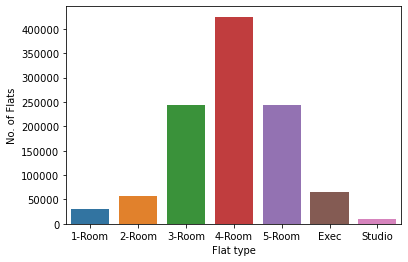

In [123]:
sns.barplot(x = 'Flat type', y = 'No. of Flats', data = apartment_types_data)